In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# need this cell to import the help functions:

import os
path_sections = os.getcwd().split('\\')
if path_sections[-1] != 'CGM':
    os.chdir('./..')

In [3]:
# import help functions:

from data_processing.cgm_data import CGMData
from data_processing.cgm_data_helper import plot_series_with_food
from data_processing.derived_datasets import max_glucose_dataset,max_glucose_between_meals_dataset

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [4]:
data = CGMData()

In [7]:
# participant_numbers = data.shape()
participant_numbers = 13

In [8]:
# Finding 5/95th percentile idea from Dan Visscher
high_glu = []
low_glu = []

# Find 5th/95th percentile for glucose range for each patient
for i in range(1,participant_numbers+1):
    low_glu.append(np.percentile(data[i].glu, 5))
    high_glu.append(np.percentile(data[i].glu, 95))


In [9]:
print(high_glu)
print(low_glu)

[137.0, 167.0, 140.0, 145.0, 129.0, 188.0, 128.0, 143.8499999999999, 177.0, 178.0, 166.0, 164.6500000000001, 168.0]
[85.0, 99.0, 85.0, 85.0, 83.0, 93.0, 70.0, 83.0, 97.2, 81.0, 87.0, 99.0, 97.85000000000001]


In [16]:
df = pd.DataFrame()

for pn in range(1,participant_numbers+1):
    # Select participant number
    participant_number = pn
    high_glu_par = high_glu[participant_number-1]

    # Max glucose between meals:
    df_sub = max_glucose_dataset(cgm_data=data,participant_num=participant_number,glu_thresh=high_glu_par)
    df = pd.concat([df, pd.DataFrame(df_sub)])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 6
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   calorie        263 non-null    float64
 1   total_carb     263 non-null    float64
 2   dietary_fiber  210 non-null    float64
 3   sugar          263 non-null    float64
 4   protein        263 non-null    float64
 5   total_fat      210 non-null    float64
 6   recent_meals   263 non-null    float64
 7   participant    263 non-null    int64  
 8   max_glucose    232 non-null    float64
 9   high_glucose   263 non-null    bool   
dtypes: bool(1), float64(8), int64(1)
memory usage: 20.8 KB


In [17]:
# Define variables to fit for Logistic Regression

X = df.total_carb.values
y = df.high_glucose.values

In [18]:
# Split testing and training data

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2,
                                                       stratify=y)

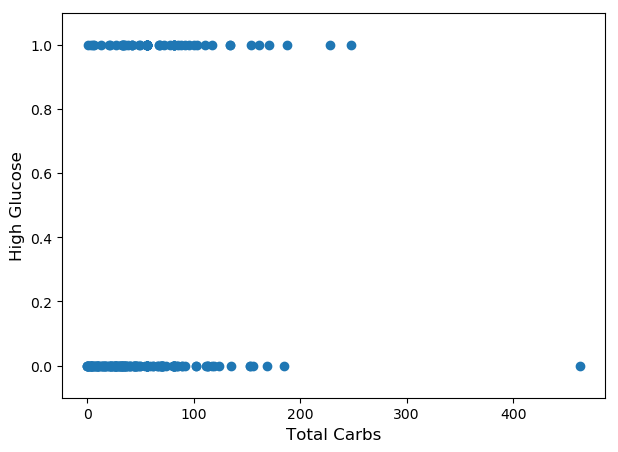

In [19]:
# Plot the training data

plt.figure(figsize = (7,5))

plt.scatter(X_train,y_train)
plt.ylim((-.1,1.1))
plt.xlabel("Total Carbs",fontsize = 12)
plt.ylabel("High Glucose",fontsize = 12)

plt.show()

In [20]:
# Instantiate the logistic regression
log_reg = LogisticRegression(penalty=None)

# Fit the model
log_reg.fit(X_train.reshape(-1,1),
            y_train)

LogisticRegression(penalty=None)

In [21]:
# Make predictions
log_reg.predict(X_train.reshape(-1,1))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [22]:
# Quantify the prediction probabilities
log_reg.predict_proba(X_train.reshape(-1,1))

array([[0.75731862, 0.24268138],
       [0.71339239, 0.28660761],
       [0.60684872, 0.39315128],
       [0.71339239, 0.28660761],
       [0.76013022, 0.23986978],
       [0.68707642, 0.31292358],
       [0.75432662, 0.24567338],
       [0.56233193, 0.43766807],
       [0.79657195, 0.20342805],
       [0.7943507 , 0.2056493 ],
       [0.5606512 , 0.4393488 ],
       [0.77726755, 0.22273245],
       [0.73302873, 0.26697127],
       [0.74129447, 0.25870553],
       [0.66693015, 0.33306985],
       [0.79042036, 0.20957964],
       [0.71339239, 0.28660761],
       [0.60989816, 0.39010184],
       [0.52232591, 0.47767409],
       [0.60379093, 0.39620907],
       [0.76353623, 0.23646377],
       [0.79183036, 0.20816964],
       [0.59354079, 0.40645921],
       [0.76553311, 0.23446689],
       [0.6910982 , 0.3089018 ],
       [0.71339239, 0.28660761],
       [0.66693015, 0.33306985],
       [0.78643511, 0.21356489],
       [0.66693015, 0.33306985],
       [0.62681075, 0.37318925],
       [0.

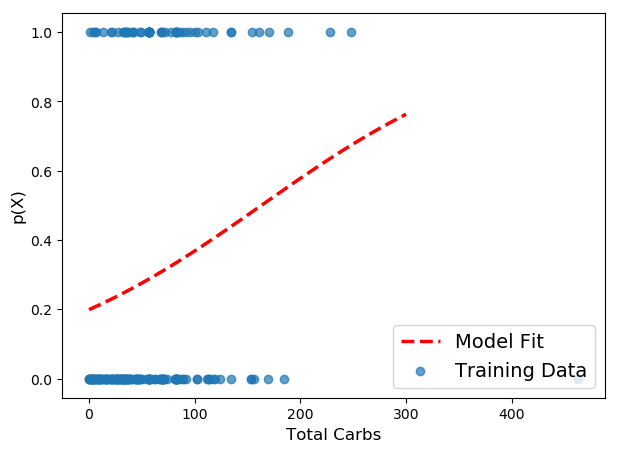

In [24]:
# Plot the training data with the logistic regression

plt.figure(figsize = (7,5))

plt.plot(np.linspace(0,300,1000),
            log_reg.predict_proba(np.linspace(0,300,1000).reshape(-1,1))[:,1],
            'r--',linewidth=2.5,label = "Model Fit")
plt.scatter(X_train,y_train,label = 'Training Data',alpha=.7)
plt.legend(fontsize = 14,loc = 4)
plt.xlabel("Total Carbs",fontsize = 12)
plt.ylabel("p(X)",fontsize=12) 

plt.show()

In [31]:
# Set the cutoff
cutoff = .4

# Store the predicted probabilities
y_prob = log_reg.predict_proba(X_train.reshape(-1,1))[:,1]

# Assign the value based on the cutoff
y_train_pred = 1*(y_prob >= cutoff)

# Print the accuracy
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_train_pred == y_train)/len(y_train))

The training accuracy for a cutoff of 0.4 is 0.7047619047619048


In [32]:
## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

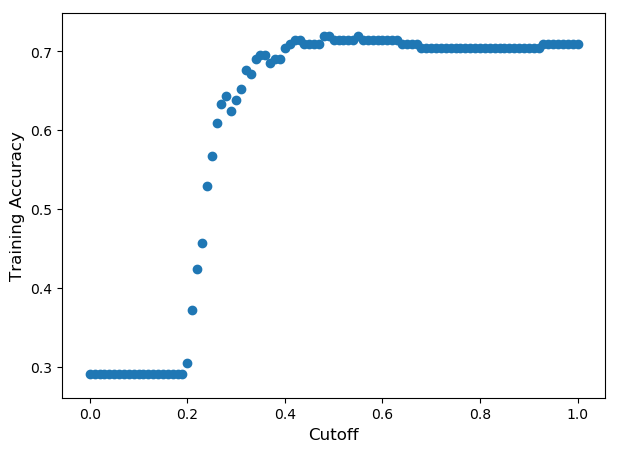

In [33]:
plt.figure(figsize=(7,5))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training Accuracy",fontsize=12)

plt.show()

In [34]:
## demonstrate log_reg.coef_
log_reg.coef_[0][0]

0.008532722630325689

In [35]:
print("A .1 unit increase in our feature multiplies" + 
      " the odds of being classified as 1 by " + 
      str(np.round(np.exp(.1*log_reg.coef_[0][0]),2)))

A .1 unit increase in our feature multiplies the odds of being classified as 1 by 1.0


next steps: 
1. put in data from all but the hold out participants
2. use first predictor project code to get baseline model predictions
3. predict on testing data